In [20]:

#TO Do:

#Provide the trend chart for the number of complaints at monthly and daily granularity levels.
#Provide a table with the frequency of complaint types.
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
#Create a new categorical variable with value as Open and Closed. 
#and Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
#Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

#Which state has the maximum complaints
#Which state has the highest percentage of unresolved complaints
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.





# Step-1 :   Import all Libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
# Step-2 :   Reading Data Set

data=pd.read_csv("E:\Comcast_telecom_complaints_data.csv")

# Analyse  The Data Set

data.head(15)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No
8,318072,Comcast extended outages,06-01-15,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes


In [22]:
# Step-3 :  Understand The Data Set

data.info()

# In this We have Date Column Is in Object Type, We Should Conver to DataTime Type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [24]:
# Step-4 :  Convert Date column From Object to DateTime type and OverWrite it

data['Date']=pd.to_datetime(data['Date']) 

# check for Confirmation

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [26]:
# Step-5 : To Know the Trend of complaints in month We should Add New Column Named as Month

data['Month']=data['Date'].dt.month_name()

# Check For Confirmation 

data.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'Month'],
      dtype='object')

In [37]:
# Step-6 : Analyse number of Complaints in month wise

Monthly=data.groupby(['Month']).size().reset_index()
Monthly=Monthly.rename(columns={0:"Counts"})
type(Monthly)    # To Plot the graph It should Be In Dataframe
Monthly


,Month,Counts
0,April,545
1,June,1280
2,May,399


<AxesSubplot:xlabel='Month'>

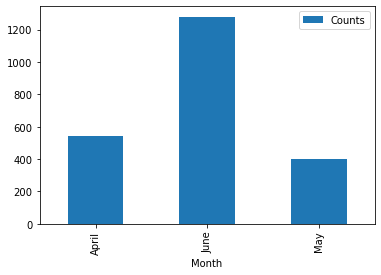

In [35]:
# Step-7 :  Plotting The Graph Of Monthly Complaints

Monthly.plot(x='Month',y='Counts',kind='bar')

In [46]:
# Step- 8 :  Analyse the complaints On Daily basis

Daily=data.groupby('Date').size().reset_index()
Daily=Daily.rename(columns={0:'Counts'})
Daily

,Date,Counts
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6
...,...,...
86,2015-06-26,55
87,2015-06-27,39
88,2015-06-28,27
89,2015-06-29,51


<AxesSubplot:xlabel='Date'>

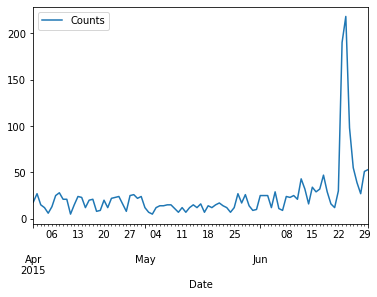

In [49]:
# Step -9 Plotting The graph of Complaints On Daily basis

Daily.plot(x='Date',y='Counts',kind='line')

In [60]:
# Step-10 : analysing Customer Complaints

data['Customer Complaint']=data['Customer Complaint'].apply(lambda x: x.lower().replace('caps','cap'))
df=data['Customer Complaint'].value_counts().reset_index()[:10]
df

,index,Customer Complaint
0,comcast,102
1,comcast data cap,51
2,comcast internet,29
3,data cap,25
4,comcast billing,18
5,comcast service,15
6,internet speed,15
7,unfair billing practices,13
8,comcast complaint,11
9,comcast/xfinity,11


<AxesSubplot:xlabel='index'>

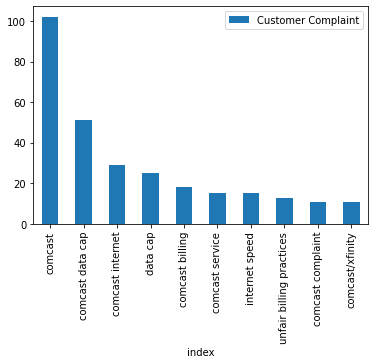

In [61]:
df.plot(x='index',y='Customer Complaint',kind='bar')

In [67]:
# Step - 11 : Analysing Different Complaints  like Internet, Bill, and Services

# 1: Internet
 
Internet_1=data[data['Customer Complaint'].str.contains('internet')].count()
Internet_2=data[data['Customer Complaint'].str.contains('speed')].count()
Internet_3=data[data['Customer Complaint'].str.contains('data')].count()
Internet_4=data[data['Customer Complaint'].str.contains('network')].count()
total_Internet_issues=Internet_1+Internet_2+Internet_3+Internet_4
total_Internet_issues['Ticket #']

945

In [69]:
#2: Bill
Bill_1=data[data['Customer Complaint'].str.contains('bill')].count()
Bill_2=data[data['Customer Complaint'].str.contains('payment')].count()
Bill_3=data[data['Customer Complaint'].str.contains('charge')].count()
Total_bill=Bill_2+Bill_1+Bill_3
Total_bill['Ticket #']


279

In [70]:
#3: Service
service_1=data[data['Customer Complaint'].str.contains('service')].count()
service_2=data[data['Customer Complaint'].str.contains('customers')].count()
total_service=service_1+service_2
total_service['Ticket #']


313

In [72]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [73]:
#Step - 11 :  Create a new categorical variable with value as Open and Closed. 
#Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

data.groupby(['']).size()

Status
Closed     734
Open       363
Pending    154
Solved     973
dtype: int64

In [77]:
data['New_Status']=[ 'Closed'    if x=='Closed' or x=='Solved'  else  'Open'  for x in data['Status']]
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,New_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed


In [80]:
# Step - 12 :  Provide state wise status of complaints in a stacked bar  chart with new created column 

data.groupby(['State','New_Status']).size()

State          New_Status
Alabama        Closed        17
               Open           9
Arizona        Closed        14
               Open           6
Arkansas       Closed         6
                             ..
Virginia       Open          11
Washington     Closed        75
               Open          23
West Virginia  Closed         8
               Open           3
Length: 77, dtype: int64

In [119]:
State_complaints=data.groupby(['State','New_Status']).size().unstack().fillna(0)
State_complaints

New_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:xlabel='State'>

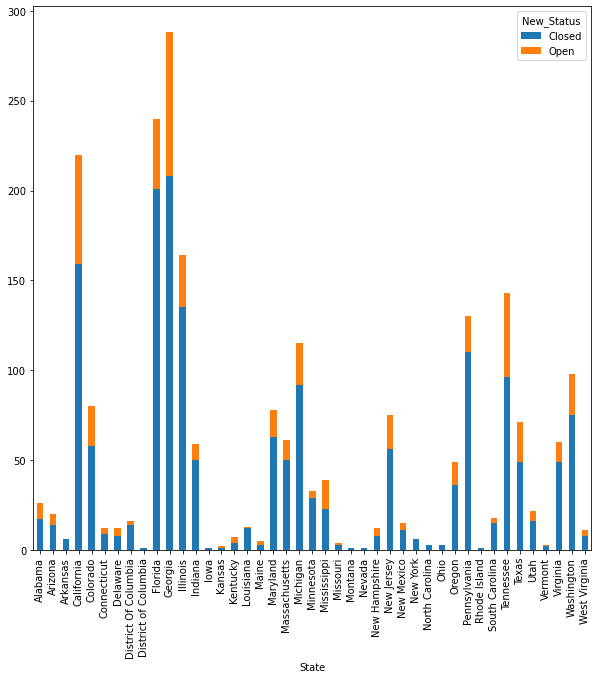

In [86]:
State_complaints.plot.bar(stacked=True,figsize=(10,10))

In [91]:
# Step - 12 :  Top 10 states have max complaints

data.groupby(['State']).size().sort_values(ascending=False)[:10]

State
Georgia         288
Florida         240
California      220
Illinois        164
Tennessee       143
Pennsylvania    130
Michigan        115
Washington       98
Colorado         80
Maryland         78
dtype: int64

In [101]:
# Step - 13 : Top 10 state has the highest percentage of unresolved complaints

unresolved_complaints=data.groupby(['State','New_Status']).size().unstack().fillna(0).sort_values(by='Open',ascending=False)[:10]
unresolved_complaints['unresolved_comp_perc']=unresolved_complaints['Open']/unresolved_complaints['Open'].sum()*100
unresolved_complaints

New_Status,Closed,Open,unresolved_comp_perc
State,,,
Georgia,208.0,80.0,21.857923
California,159.0,61.0,16.666667
Tennessee,96.0,47.0,12.841530
Florida,201.0,39.0,10.655738
Illinois,135.0,29.0,7.923497
Washington,75.0,23.0,6.284153
Michigan,92.0,23.0,6.284153
Colorado,58.0,22.0,6.010929
Texas,49.0,22.0,6.010929


<AxesSubplot:xlabel='State'>

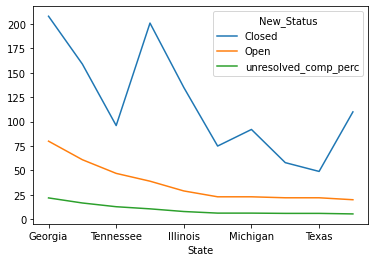

In [102]:
unresolved_complaints.plot()

In [107]:
# step - 14 : Provide the percentage of complaints resolved till date, 
#which were received through the Internet and customer care calls.


resolved=data.groupby(['Received Via','New_Status']).size().unstack().fillna(0)
resolved

New_Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [110]:
resolved['resolved_perc']=resolved['Closed']/resolved['Closed'].sum()*100
resolved

New_Status,Closed,Open,resolved_perc
Received Via,,,
Customer Care Call,864,255,50.615114
Internet,843,262,49.384886


<AxesSubplot:xlabel='Received Via'>

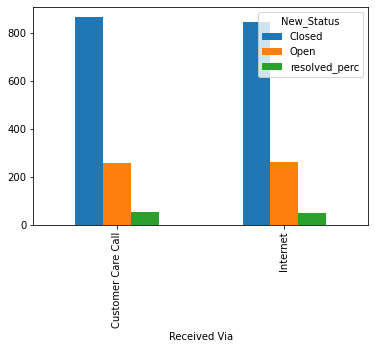

In [111]:
resolved.plot(kind='bar')